PyTorch Workflow

Lets explore an example PyTorch end-to-end workflow.

Resources:

- Github notebook: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
- Book version of the notebook: https://www.learnpytorch.io/01_pytorch_workflow/
- YouTube video: https://youtu.be/Z_ikDlimN6A


In [1]:
what_we_are_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting a model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together",
}

In [2]:
import torch
from torch import nn  # nn contains all PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.2.1+cpu'

## 1. Data (preparing and loading)

Data can be almost anything... in ML.

- Excel spreadsheet (rows and columns)
- Images of any kind
- Videos (YouTube has lots of data...)
- Audio like songs and podcasts
- DNA
- Text

ML is a game of two parts:

1. Get data into numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some known data using the linear regression formula _(Y = a + bX) or (Y = mX + c) or (Yi = f(Xi, beta) + ei)_


### ## Creating a simple dataset using linear regression

We'll use a linear regression formula to make a straight line with known **parameters**. _(parameter - something that a model learns)_


In [3]:
# Create *known* parameters
weight = 0.7  # b
bias = 0.3  # a

# Create a range of numbers
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
# y = mx + c
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### ## Splitting our sata into training and test sets (one of the most important concept in ML)

Let's create a training and test set with our data


In [4]:
# Create a train/test split
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### ## Building a function to visualize our data


In [5]:
def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=None,
):
    """
    Plots training data, test data and compares predictions
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

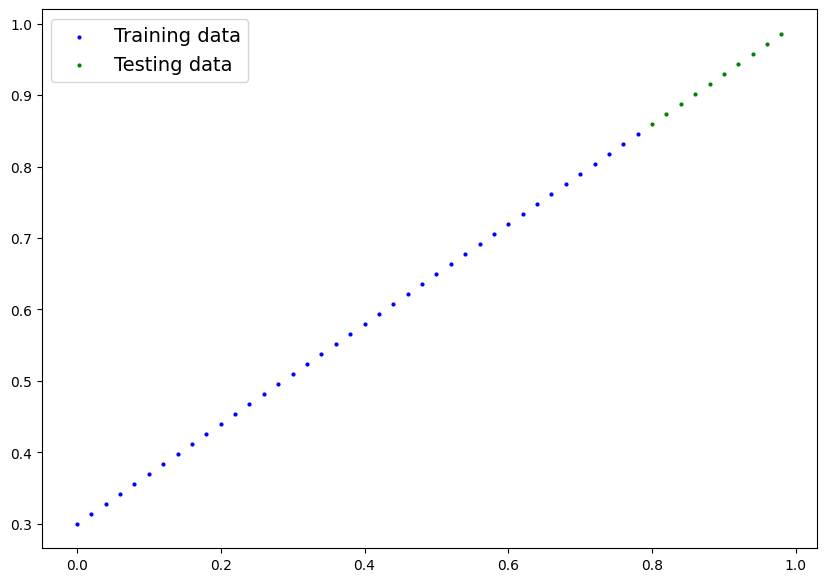

In [6]:
plot_predictions()

### ## Creating our first PyTorch model for linear regression

we'll be using classes so OOP knowledge will come in handy.
Useful resource for OOP from Real Python: https://realpython.com/python3-object-oriented-programming/

Also, we'll use `nn.Module` a lot, almost everything in PyTorch inherits from `nn.Module`. Its like a building block, it has a lot of helpful in-built things for building PyTorch models.
See PyTorch's documentation.

y = wx + b, where w and b are parameters, b is the bias.

What our model does:

- Start with random values (weight and bias)
- Look at training data and adjust the random values to better represent (or get close to) the ideal values (the weight and bias values we used to create the data)

How does it do so?

Through two main algorithms:

1. Gradient descent - https://youtu.be/IHZwWFHWa-w
2. Backpropagation - https://youtu.be/llg3gGewQ5U
   (3blue1brown videos)


In [7]:
# create linear regression model class


class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        # Initialize model parameters
        self.weights = nn.Parameter(
            torch.rand(1, requires_grad=True, dtype=torch.float)
        )
        self.bias = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))

    # forward() to define the computation in the model
    def forward(self, x: torch.Tensor):  ## torch.Tensor:  # <- "x" is the input data
        return self.weights * x + self.bias

## Breaking down what's happening in our PyTorch linear regression model

5.11.00


## PyTorch essential neural network building modules

- `torch.nn` - contains all of the building for neural networks (computational graphs)
- `torch.nn.Parameter` - what parameter should our model try and learn, often a PyTorch layer from `torch.nn` will set these for us.
- `torch.nn.Module` - The base class for all neural network modules, if you subclass it, you should overwrite `forward`
- `torch.optim` - this's where the optimizers in PyTorch live, (they tell the model parameters stored in `nn.Parameters` how to best change to improve gradient descent and in turn reduce the loss)
- `def forward()` - All `nn.Module` subclasses require you to overwrite `forward()`, this method defines what happens in the forward computation

There are also others we'll encounter later:

- `torch.utils.data.Dataset` - Represents a map between key(label) and sample (features) pairs of your data. Such as images and their associated labels.
- `torch.utils.data.Dataloader` - Creates a Python iterable over a `torch Dataset` (allows you to iterate over your data)

See docs, PyTorch cheat sheet: https://pytorch.org/tutorials/beginner/ptcheat.html


## Checking out the internals of our PyTorch model

Now we've created a model, let's see what's inside...

So we ca check our model parameters or what's inside our model using `.parameters()`.


In [8]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

print(model_0, "\n")

# Check out the parameters
print(list(model_0.parameters()))

LinearRegressionModel() 

[Parameter containing:
tensor([0.8823], requires_grad=True), Parameter containing:
tensor([0.9150], requires_grad=True)]


In [9]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

Out goal is to use backpropagation and gradient descent to adjust the random values(model parameters), to get them as close as possible to the ideal values (weight and bias)

In most cases, we won't know what the ideal values are, but in our case, we know them


In [10]:
# The ideal values
weight, bias

(0.7, 0.3)

## Making predictions with our random model using `torch.inference_mode()`

To check our model's predictve power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method.


In [11]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [12]:
# Make predictions with model (inference)
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

`torch.inference_mode()` turns off gradient tracking (better than `torch.no_grad()`)

Search: x/twitter torch.inference_mode

Thread: https://twitter.com/PyTorch/status/1437838231505096708?s=20&t=cnKav09lTgw0-rfri6u7PQ

Since the model parameters are untrained (random), the model'spredictions are just random.


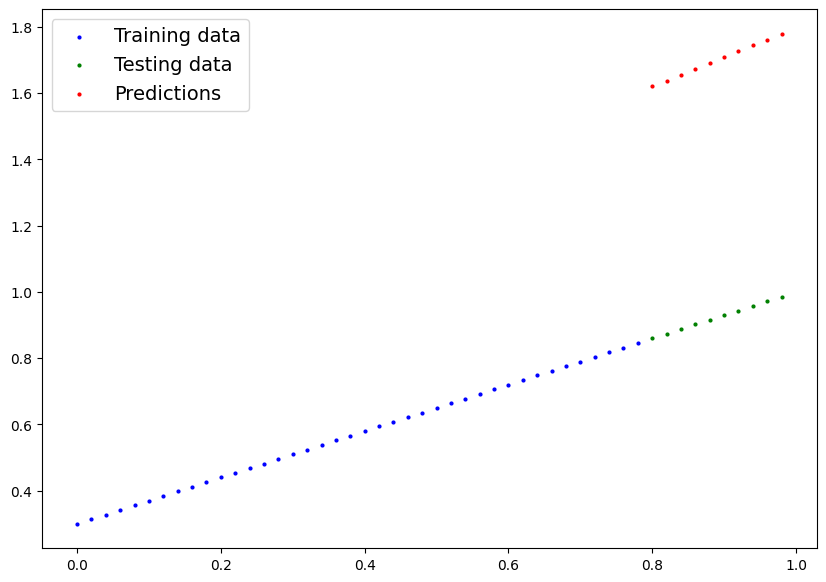

In [13]:
# Let's visualize them
plot_predictions(predictions=y_preds)

## Training a model with PyTorch (intuition building)

The whole idea of training is for a model to move from some unknown parameters (these may be random) to some known

Or in other words from a poor representation of the data to a better representation of the data

One way tp measure how poor or how wrong your model's predictions are is to use a loss function.

- Note: **Loss function** may also be called **cost function** or **criterion** in different areas. For our case, we're going to it as a loss function.

Things we need to train:

- **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

  There are many loss functions contained in `torch.nn` (see PyTorch docs on loss functions), Here are a few common ones:

  - L1Loss (Mean Absolute Error), will suffice for refression tasks. Its implemented with `torch.nn.L1Loss` or `torch.mean(torch.abs(y_pred-y_test))`
  - L2Loss (Meas Squares Error)
  - Cross Entropy loss
  - BCELoss (Binary Cross Entropy Loss), mostly for binary classification.

- **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight and bias in our case) to improve the loss function (minimize loss).
  Its in `torch.optim`.
      Most common ones are:
      - `Adam`
      - `SGD` (Stochastic/random Gradient Descent). It starts by randomly adjusting the model's parameters to minimize the loss value.

* Inside the optimizer, you'll often need to set two parameters:
  - `params` - the model parameters you'd like to optimize, e.g. `params=model_0.parameters()`
  - `lr` - the learning rate is a **hyperparameter** that defines how big/small the optimizer changes the parameters with each step (a small lr results in small changes, a large lr results in larger changes).

  - The learning rate tells the optimizer how much to adjust the parameters, the higher the lr, the more the optimizer adjusts the params.

And specifically for PyTorch, we need:

- A training loop
- A testing loop


In [14]:
# model's parameters
model_0.state_dict()


OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

## Setting up a loss function and optimizer with PyTorch


In [18]:
# Setting up a loss function
loss_fn = nn.L1Loss()

# Setting up an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)


In [19]:
loss_fn, optimizer

(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

## Training loop and Testing loop in PyTorch (steps and intuition)

A couple of things we need in a training loop:

0. Loop through the data. One loop through the data is called an **epoch**. Its a _hyperparameter_ becouse we set it ourselves.Loop through the data and do...

   1. **Forward pass** (this involves data moving through our model's `forward()` function/functions) to make predictions on data
   2. Calculate the **loss** (compare forward pass predictions to ground truth labels)
   3. Optimizer zero grad
   4. **Backpropagation**/Loss backward - move backwards through the network to calculate the gradients (slope, rate of change, steepness of a hill) of each of the parameters of the model with respect to the loss
   5. **Gradient Descent**/Optimizer step - use the optimizer to adjust our model's parameters to try and minimize the loss

   - by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop


In [ ]:
# Set number of epochs
epochs = 1

# Training loop
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train()  # sets all params that require gradients to require gradients

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the model's params
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step()
